---

<h1 style="text-align: center;font-size: 40px;">Death caused by Road accidents: Data analysis</h1>

---

<center><img src="https://media.istockphoto.com/vectors/cartoon-illustration-of-a-head-on-collision-vector-id163836327?k=20&m=163836327&s=612x612&w=0&h=L_wO5hzRkAIwqVDBsZ1rK894F5AVqmAf6a_gCENiQfQ=
"width="500" height="600"></center>

---

In [155]:
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
pd.set_option('display.max_rows',None)

In [156]:
df = pd.read_csv("../input/road-traffic-deaths-1990-to-2019/output.csv")
df.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 8010 non-null   object 
 1   Code                   6150 non-null   object 
 2   Year                   8010 non-null   int64  
 3   Deaths                 8010 non-null   int64  
 4   Sidedness              8010 non-null   int64  
 5   Historical_Population  6300 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 375.6+ KB


In [158]:
df.isnull().sum()

Entity                      0
Code                     1860
Year                        0
Deaths                      0
Sidedness                   0
Historical_Population    1710
dtype: int64

In [159]:
len(df['Entity'].unique())

267

In [160]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [161]:
df.columns

Index(['Entity', 'Code', 'Year', 'Deaths', 'Sidedness',
       'Historical_Population'],
      dtype='object')

> Which year has the maximum amount of death according to each country?

In [162]:
country = list(df['Entity'].unique())
new_df = pd.DataFrame({'Entity': [], 'Code': [], 'Year': [],'Deaths': []})
for con in country:
    ndf = df[df['Entity'] == con]
    ndf = ndf[ndf['Deaths'] == ndf['Deaths'].max()]
    
    new_df = new_df.append(ndf,ignore_index=True)#dict(df[df['Entity'] == con].max())

In [163]:
new_df.sort_values(by = 'Deaths',ascending =False).head(10)

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
540,World,OWID_WRL,2008.0,1285039.0,0.0,6.789396e+09
137,G20,NaN,2008.0,836394.0,0.0,NaN
39,Asia,NaN,2010.0,800886.0,0.0,4.208481e+09
544,World Bank Upper Middle Income,NaN,2005.0,596946.0,0.0,NaN
255,Middle SDI,NaN,2009.0,493523.0,0.0,NaN
115,East Asia & Pacific - World Bank region,NaN,2004.0,480385.0,0.0,NaN
543,World Bank Lower Middle Income,NaN,2012.0,470563.0,0.0,NaN
445,"Southeast Asia, East Asia, and Oceania",NaN,2005.0,462434.0,0.0,NaN
538,Western Pacific Region,NaN,2009.0,399720.0,0.0,NaN
81,Commonwealth,NaN,2019.0,343554.0,0.0,NaN


> This dataset contains region wise values also, like total number of accident around the world in a year, G20 countries, commonwealth middle income countries, different continents etc. So let's separate those fields at first.

In [164]:
new_df[new_df.duplicated(subset = 'Entity')].tail(10)

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
515,Tuvalu,TUV,2011.0,3.0,1.0,10626.0
516,Tuvalu,TUV,2012.0,3.0,1.0,10744.0
517,Tuvalu,TUV,2013.0,3.0,1.0,10849.0
518,Tuvalu,TUV,2014.0,3.0,1.0,10973.0
519,Tuvalu,TUV,2015.0,3.0,1.0,11099.0
520,Tuvalu,TUV,2016.0,3.0,1.0,11232.0
521,Tuvalu,TUV,2017.0,3.0,1.0,11365.0
522,Tuvalu,TUV,2018.0,3.0,1.0,11505.0
523,Tuvalu,TUV,2019.0,3.0,1.0,11655.0
530,United States Virgin Islands,VIR,1996.0,21.0,0.0,107939.0


>Extracting Regions:

In [165]:
new_df.loc[122, 'Code'] = 'ENG'

In [166]:
region = new_df[new_df['Code'].isnull()]
region.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
1,Africa,NaN,2019.0,236531.0,0.0,1.308064e+09
2,African Region,NaN,2019.0,182243.0,0.0,NaN
3,African Union,NaN,2019.0,236531.0,0.0,NaN
6,America,NaN,2009.0,161802.0,0.0,NaN
21,Andean Latin America,NaN,2011.0,11906.0,0.0,NaN


>Separating Countries

In [167]:
country = new_df.dropna()
country.sort_values(by = 'Deaths',ascending =False).head(5)

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
540,World,OWID_WRL,2008.0,1285039.0,0.0,6.789396e+09
79,China,CHN,2009.0,329237.0,1.0,1.361169e+09
178,India,IND,2012.0,218869.0,1.0,1.265780e+09
179,Indonesia,IDN,2001.0,50597.0,1.0,2.144274e+08
61,Brazil,BRA,2011.0,49449.0,0.0,1.975145e+08


> We can see that world has also been included in the country dataframe, which should be in region dataframe, so drop this field first, from country dataframe and append this into region dataframe.

In [168]:
country[country['Entity'] == 'World']

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
540,World,OWID_WRL,2008.0,1285039.0,0.0,6.789396e+09


> Which year has the highest number of death by accidents in each country? 

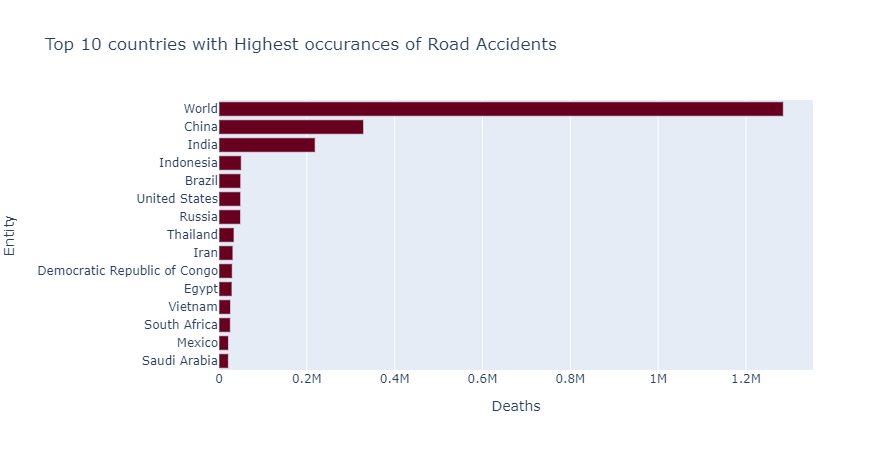

In [169]:
top15 = country.sort_values(by = 'Deaths',ascending = False)[:15]
fig = px.bar(top15[::-1], x= 'Deaths', 
            y = 'Entity', orientation = 'h', color_discrete_sequence  = px.colors.sequential.RdBu, 
            title = 'Top 10 countries with Highest occurances of Road Accidents',
            hover_name = 'Year')
fig.show()

In [170]:
region[region['Entity'] == 'World']

,Entity,Code,Year,Deaths,Sidedness,Historical_Population


In [171]:
region.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
1,Africa,NaN,2019.0,236531.0,0.0,1.308064e+09
2,African Region,NaN,2019.0,182243.0,0.0,NaN
3,African Union,NaN,2019.0,236531.0,0.0,NaN
6,America,NaN,2009.0,161802.0,0.0,NaN
21,Andean Latin America,NaN,2011.0,11906.0,0.0,NaN


In [172]:
region = region.append(country[country['Entity'] == 'World'],ignore_index=True)
region.tail(5)

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
57,World Bank High Income,NaN,1990.0,193137.0,0.0,NaN
58,World Bank Low Income,NaN,2019.0,120076.0,0.0,NaN
59,World Bank Lower Middle Income,NaN,2012.0,470563.0,0.0,NaN
60,World Bank Upper Middle Income,NaN,2005.0,596946.0,0.0,NaN
61,World,OWID_WRL,2008.0,1285039.0,0.0,6.789396e+09


> Dropping world field from the country dataset

In [173]:
country[country['Entity'] == 'World']

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
540,World,OWID_WRL,2008.0,1285039.0,0.0,6.789396e+09


In [174]:
country.drop(540, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> Which year between (1990 to 2019) has the maximum amount of death according to each country?

In [175]:
top10 = country.sort_values(by = 'Deaths',ascending = False)[:10]
top10

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
79,China,CHN,2009.0,329237.0,1.0,1.361169e+09
178,India,IND,2012.0,218869.0,1.0,1.265780e+09
179,Indonesia,IDN,2001.0,50597.0,1.0,2.144274e+08
61,Brazil,BRA,2011.0,49449.0,0.0,1.975145e+08
528,United States,USA,2002.0,49318.0,0.0,2.872793e+08
365,Russia,RUS,1994.0,49102.0,0.0,1.483494e+08
459,Thailand,THA,1996.0,34153.0,1.0,6.013019e+07
180,Iran,IRN,2003.0,31635.0,0.0,6.812295e+07
99,Democratic Republic of Congo,COD,2015.0,30061.0,0.0,7.624453e+07
120,Egypt,EGY,2019.0,29490.0,0.0,1.003881e+08


- From 1990 to 2019 china has the maximum number of death which is 329237, in a single year 2009

> Which year has the lowest number of death by accidents in each country?


In [176]:
bottom15 = country[~(country['Deaths'] == 0)]
bottom15 = bottom15.sort_values(by = 'Deaths', ascending = False).tail(15)
bottom15

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
400,San Marino,SMR,2001.0,3.0,0.0,27818.0
399,San Marino,SMR,2000.0,3.0,0.0,27460.0
398,San Marino,SMR,1999.0,3.0,0.0,27141.0
397,San Marino,SMR,1998.0,3.0,0.0,26851.0
396,San Marino,SMR,1997.0,3.0,0.0,26563.0
395,San Marino,SMR,1996.0,3.0,0.0,26253.0
394,San Marino,SMR,1995.0,3.0,0.0,25925.0
393,San Marino,SMR,1994.0,3.0,0.0,25588.0
392,San Marino,SMR,1993.0,3.0,0.0,25208.0
391,San Marino,SMR,1992.0,3.0,0.0,24830.0


> San Marino and Tuvalu has the lowest occurances of road accidents

> Extracting country and region including all year

In [177]:
region = df[df['Code'].isnull()]

country = df.dropna()
country.sort_values(by = 'Deaths',ascending =False).head(5)


,Entity,Code,Year,Deaths,Sidedness,Historical_Population
7788,World,OWID_WRL,2008,1285039,0,6.789396e+09
7789,World,OWID_WRL,2009,1282368,0,6.873078e+09
7790,World,OWID_WRL,2010,1279539,0,6.957138e+09
7787,World,OWID_WRL,2007,1274027,0,6.706251e+09
7785,World,OWID_WRL,2005,1269937,0,6.542205e+09


In [178]:
region = region.append(country[country['Entity'] == 'World'],ignore_index=True)

In [179]:
country = country[country['Entity'] != "World"]
country.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


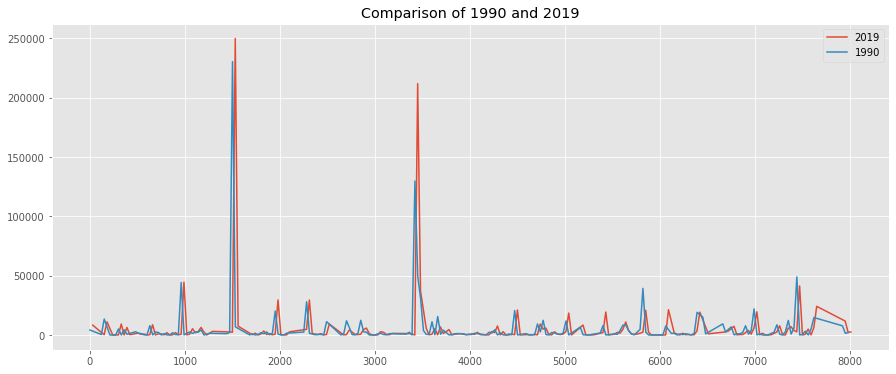

In [180]:
year_2019 = country[country['Year'] == 2019]
year_1990 = country[country['Year'] == 1990]
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
plt.plot(year_2019['Deaths'], label = '2019')
plt.plot(year_1990['Deaths'], label = '1990')

plt.title('Comparison of 1990 and 2019')
plt.grid(True)
plt.legend()
plt.show()

> We can see the difference between year 1990 and 2019. With time the amount of death by accident has increased drastically for some countries.

> Which year has the highest amount of death by road accident?

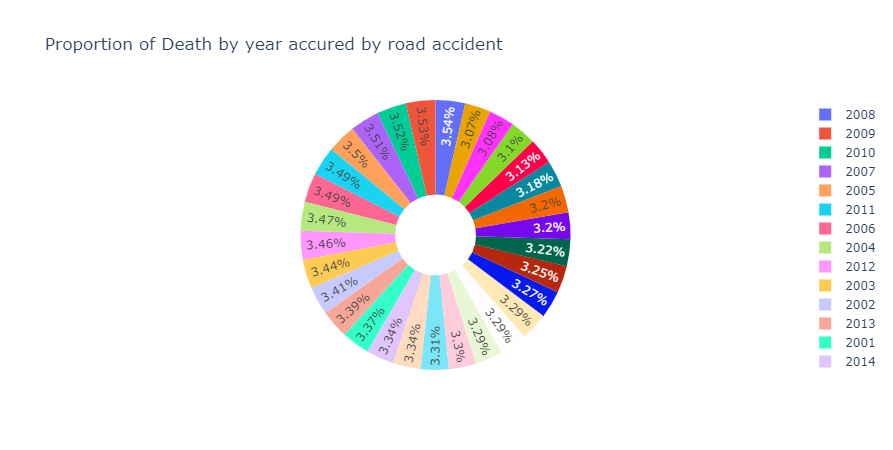

In [181]:
whole_world = df[df['Entity'] == 'World']
fig = px.pie(whole_world, values='Deaths',hole = 0.3, names='Year',
             title='Proportion of Death by year accured by road accident',
             )#color_discrete_sequence=['green', 'red']
fig.show()

> The proportion remains almost constant throughout the year.

In [183]:
top15_country_by_year = pd.DataFrame()
for i in list(country['Year'].unique()):
    country_by_year = country[country['Year'] == i].sort_values(by='Deaths',ascending = False).head(10)
    top15_country_by_year = top15_country_by_year.append(country_by_year, ignore_index=False)

In [184]:
top15_country_by_year.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
1500,China,CHN,1990,230499,1,1.176884e+09
3420,India,IND,1990,129821,1,8.732778e+08
3450,Indonesia,IDN,1990,49320,1,1.814134e+08
7440,United States,USA,1990,48970,0,2.521203e+08
960,Brazil,BRA,1990,44236,0,1.490032e+08


In [185]:
len(top15_country_by_year['Entity'].unique())

14

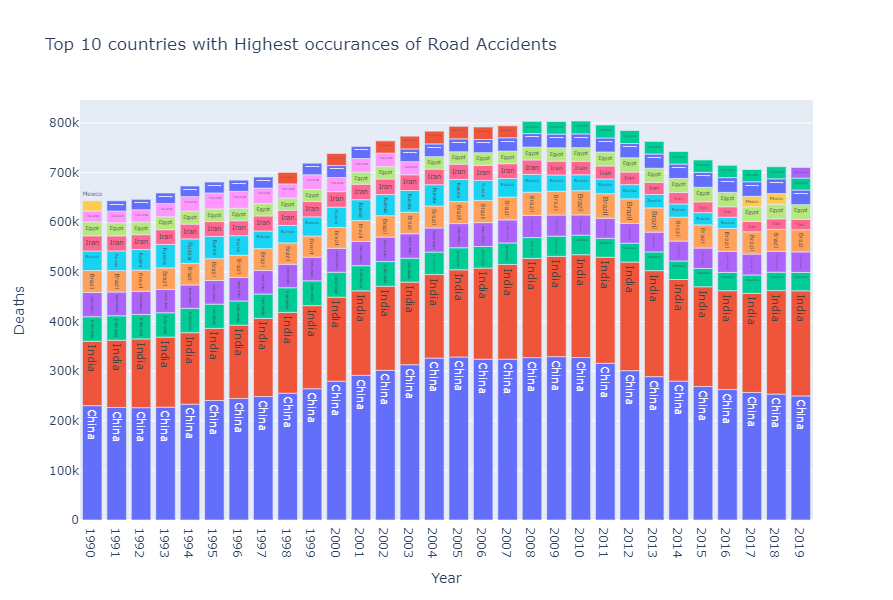

In [186]:
#top15 = country.sort_values(by = 'Deaths',ascending = False)[:15]
fig = px.bar(top15_country_by_year, y= 'Deaths', 
            x = 'Year',color ='Entity', orientation = 'v',title = 'Top 10 countries with Highest occurances of Road Accidents',
            hover_name = 'Year',height = 600,text="Entity")
fig.layout.update(showlegend=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
fig.show()

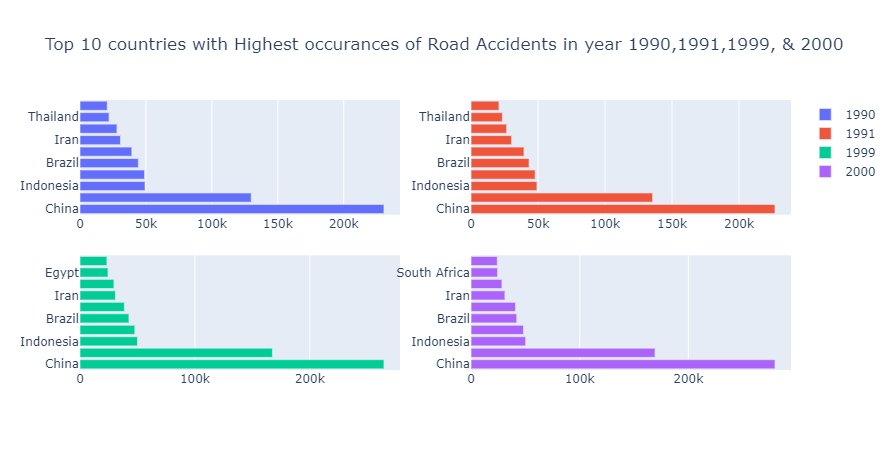

In [187]:
fig = make_subplots(rows=2,cols=2)#,column_titles = ('1990','1991')

country_1990 = top15_country_by_year[top15_country_by_year['Year'] == 1990]
country_1991 = top15_country_by_year[top15_country_by_year['Year'] == 1991]

country_1999 = top15_country_by_year[top15_country_by_year['Year'] == 1999]
country_2000 = top15_country_by_year[top15_country_by_year['Year'] == 2000]


trace_1 = go.Bar(x= country_1990['Deaths'], 
            y = country_1990['Entity'], orientation = 'h',name = '1990' 
           )

trace_2 = go.Bar(x= country_1991['Deaths'], 
            y = country_1991['Entity'], orientation = 'h',name = '1991' 
            )

trace_3 = go.Bar(x= country_1999['Deaths'], 
            y = country_1999['Entity'], orientation = 'h',name = '1999' 
           )

trace_4 = go.Bar(x= country_2000['Deaths'], 
            y = country_2000['Entity'], orientation = 'h',name = '2000' 
            )

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)
fig.append_trace(trace_3,2,1)
fig.append_trace(trace_4,2,2)

fig.update_layout(title_text="Top 10 countries with Highest occurances of Road Accidents in year 1990,1991,1999, & 2000")
fig.show()

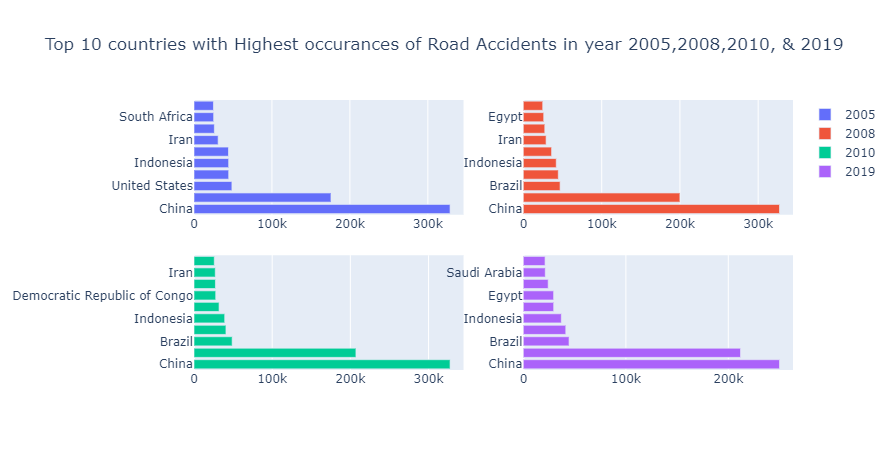

In [188]:
fig = make_subplots(rows=2,cols=2)#,column_titles = ('1990','1991')
country_2005 = top15_country_by_year[top15_country_by_year['Year'] == 2005]
country_2008 = top15_country_by_year[top15_country_by_year['Year'] == 2008]

country_2010 = top15_country_by_year[top15_country_by_year['Year'] == 2010]
country_2019 = top15_country_by_year[top15_country_by_year['Year'] == 2019]

trace_1 = go.Bar(x= country_2005['Deaths'], 
            y = country_2005['Entity'], orientation = 'h',name = '2005' 
           )

trace_2 = go.Bar(x= country_2008['Deaths'], 
            y = country_2008['Entity'], orientation = 'h',name = '2008' 
            )

trace_3 = go.Bar(x= country_2010['Deaths'], 
            y = country_2010['Entity'], orientation = 'h',name = '2010' 
           )

trace_4 = go.Bar(x= country_2019['Deaths'], 
            y = country_2019['Entity'], orientation = 'h',name = '2019' 
            )

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)
fig.append_trace(trace_3,2,1)
fig.append_trace(trace_4,2,2)

fig.update_layout(title_text="Top 10 countries with Highest occurances of Road Accidents in year 2005,2008,2010, & 2019")
fig.show()

- China and India has always been on top and second position throughout the year.

> **To Be Continued..........................................................................**